In [ ]:
%matplotlib inline

# import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# loading csv files
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Using read_csv to ride loaded csv files
mdd = pd.read_csv(mouse_drug_data_to_load)
ctd = pd.read_csv(clinical_trial_data_to_load)

# Merging the two data frames together
comb_data_df = pd.merge(ctd, mdd, on="Mouse ID", how="outer")

# Displaying table to preview
comb_data_df.head()

Tumor Response to Treatment

In [ ]:
# Storing the Mean Tumor Volume Data Grouped by Drug and Timepoint
gb_drug_timepoint = comb_data_df.groupby(['Drug', 'Timepoint']).mean()
gb_drug_timepoint_mean = gb_drug_timepoint['Tumor Volume (mm3)']

# Convert to DataFrame and previewing DataFrame
gb_drug_timepoint_mean_df = pd.DataFrame(gb_drug_timepoint_mean)
gb_drug_timepoint_mean_df

In [ ]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
gb_drug_timepoint_sem = comb_data_df.groupby(['Drug', 'Timepoint']).sem()
tv3_sem = gb_drug_timepoint_sem['Tumor Volume (mm3)']

# Convert to DataFrame and previewing DataFrame
tv3_sem_df = pd.DataFrame(tv3_sem)
tv3_sem_df

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
tp_pivot = gb_drug_timepoint_mean_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Previewing the first 5 rows of reformated data
tp_pivot

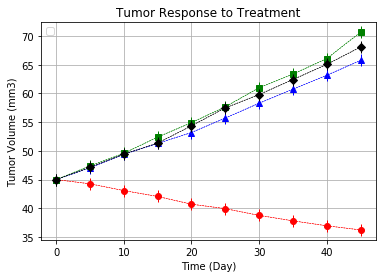

In [222]:
# Styling each plot line with Capomulin, Infufbinol, Ketapril and Placebo
cap_handle, = plt.plot(tp_pivot['Capomulin'], color='red', marker='o', linestyle='dashed', linewidth=0.5)
cap_handle1, = plt.plot(tp_pivot['Capomulin'], color='red', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
inf_handle, = plt.plot(tp_pivot['Infubinol'], color='blue', marker='^', linestyle='dashed', linewidth=0.5)
inf_handle1, = plt.plot(tp_pivot['Infubinol'], color='blue', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
ket_handle, = plt.plot(tp_pivot['Ketapril'], color='green', marker='s', linestyle='dashed', linewidth=0.5)
ket_handle1, = plt.plot(tp_pivot['Ketapril'], color='green', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
pla_handle, = plt.plot(tp_pivot['Placebo'], color='black', marker='D', linestyle='dashed', linewidth=0.5)
pla_handle1, = plt.plot(tp_pivot['Placebo'], color='black', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)

# Setting the legend. I tried both loc="best" and loc="upper left" neigther displayed information as it should
plt.legend(handles=[cap_handle, cap_handle1, inf_handle, inf_handle1, ket_handle, ket_handle1, pla_handle, pla_handle1], loc="upper left")
# Showing the grid on plot
plt.grid()
# Adding title
plt.title("Tumor Response to Treatment")
# Adding x and y labels
plt.xlabel("Time (Day)")
plt.ylabel("Tumor Volume (mm3)")
#Saving a picture of my plot to folder directory to push to Git
plt.savefig("Tumor_Response_to_Treatment")
plt.show()

Metastatic Response to Treatment

In [ ]:
# Storing the Mean Tumor Volume Data Grouped by Drug and Timepoint
gb_met_mean = comb_data_df.groupby(['Drug', 'Timepoint']).mean()
met_sit_ft = gb_met_mean['Metastatic Sites']

# Convert to DataFrame and previewing DataFrame
met_sit_df = pd.DataFrame(met_sit_ft)
met_sit_df

In [ ]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
gb_met_sem = comb_data_df.groupby(['Drug', 'Timepoint']).sem()
met_sit_ft_sem = gb_met_sem['Metastatic Sites']

# Convert to DataFrame and previewing DataFrame
met_sit_sem_df = pd.DataFrame(met_sit_ft_sem)
met_sit_sem_df

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
met_pivot = met_sit_df.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Previewing the first 5 rows of reformated data
met_pivot

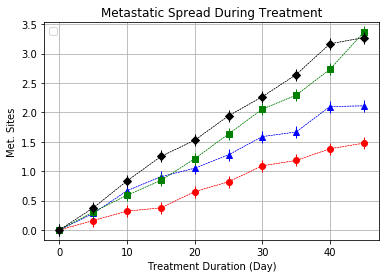

In [223]:
# Styling each plot line with Capomulin, Infufbinol, Ketapril and Placebo
cap_handle_met, = plt.plot(met_pivot['Capomulin'], color='red', marker='o', linestyle='dashed', linewidth=0.5)
cap_handle1_met, = plt.plot(met_pivot['Capomulin'], color='red', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
inf_handle_met, = plt.plot(met_pivot['Infubinol'], color='blue', marker='^', linestyle='dashed', linewidth=0.5)
inf_handle1_met, = plt.plot(met_pivot['Infubinol'], color='blue', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
ket_handle_met, = plt.plot(met_pivot['Ketapril'], color='green', marker='s', linestyle='dashed', linewidth=0.5)
ket_handle1_met, = plt.plot(met_pivot['Ketapril'], color='green', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
pla_handle_met, = plt.plot(met_pivot['Placebo'], color='black', marker='D', linestyle='dashed', linewidth=0.5)
pla_handle1_met, = plt.plot(met_pivot['Placebo'], color='black', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)

# Setting the legend. I tried both loc=\"best\" and loc=\"upper left\" neigther displayed information as it should
plt.legend(handles=[cap_handle_met, cap_handle1_met, inf_handle_met, inf_handle1_met, ket_handle_met, ket_handle1_met, \
                    pla_handle_met, pla_handle1_met], loc="upper left")
# Showing the grid on plot
plt.grid()
# Adding title
plt.title("Metastatic Spread During Treatment")
# Adding x and y labels
plt.xlabel("Treatment Duration (Day)")
plt.ylabel("Met. Sites")
#Saving a picture of my plot to folder directory to push to Git
plt.savefig("Metastatic_Response_to_Treatment")
plt.show()

Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
gb_mouse_count = comb_data_df.groupby(['Drug', 'Timepoint']).count()
mouse_count_ft = gb_mouse_count['Mouse ID']

# Convert to DataFrame and previewing DataFrame
mouse_count_df = pd.DataFrame(mouse_count_ft)
mouse_count_df

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
mouse_pivot = mouse_count_df.pivot_table(index='Timepoint', columns='Drug', values='Mouse ID')

# Previewing the first 5 rows of reformated data
mouse_pivot

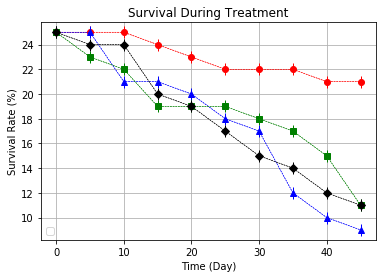

In [224]:
# Styling each plot line with Capomulin, Infufbinol, Ketapril and Placebo
cap_handle_mouse, = plt.plot(mouse_pivot['Capomulin'], color='red', marker='o', linestyle='dashed', linewidth=0.5)
cap_handle1_mouse, = plt.plot(mouse_pivot['Capomulin'], color='red', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
inf_handle_mouse, = plt.plot(mouse_pivot['Infubinol'], color='blue', marker='^', linestyle='dashed', linewidth=0.5)
inf_handle1_mouse, = plt.plot(mouse_pivot['Infubinol'], color='blue', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
ket_handle_mouse, = plt.plot(mouse_pivot['Ketapril'], color='green', marker='s', linestyle='dashed', linewidth=0.5)
ket_handle1_mouse, = plt.plot(mouse_pivot['Ketapril'], color='green', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)
pla_handle_mouse, = plt.plot(mouse_pivot['Placebo'], color='black', marker='D', linestyle='dashed', linewidth=0.5)
pla_handle1_mouse, = plt.plot(mouse_pivot['Placebo'], color='black', marker='|', markersize=12, linestyle='dashed', linewidth=0.5)

# Setting the legend. I tried both loc=\"best\" and loc=\"upper left\" neigther displayed information as it should
plt.legend(handles=[cap_handle_mouse, cap_handle1_mouse, inf_handle_mouse, inf_handle1_mouse, ket_handle_mouse, ket_handle1_mouse, \
                    pla_handle_mouse, pla_handle1_mouse], loc="lower left")
# Showing the grid on plot\
plt.grid()
# Adding title
plt.title("Survival During Treatment")
# Adding x and y labels
plt.xlabel("Time (Day)")
plt.ylabel("Survival Rate (%)")
#Saving a picture of my plot to folder directory to push to Git
plt.savefig("Survival_rate")
plt.show()

Summary Bar Graph

In [ ]:
# Calculating the percentage for Capomulin, Infubinol, Ketapril and Placebo from a pivot table
cap_perc_change = tp_pivot.Capomulin[45] / tp_pivot.Capomulin[0] - 1
inf_perc_change = tp_pivot.Infubinol[45] / tp_pivot.Infubinol[0] - 1
ket_perc_change = tp_pivot.Ketapril[45] / tp_pivot.Ketapril[0] - 1
pla_perc_change = tp_pivot.Placebo[45] / tp_pivot.Placebo[0] - 1

# Creating a series so that I can manipulate the data
drug_perc_change = pd.DataFrame({"Drugs": ["Capomulin", "Infubinol", "Ketapril", "Placebo"], "Percent Changes": [cap_perc_change, inf_perc_change, ket_perc_change, pla_perc_change]})
drug_perc_change

In [ ]:
# I like to use a pivot table because it works for me. Gives me more options that I know of to manipulate the data
drugs_pt = drug_perc_change.pivot_table(index='Drugs', columns='Drugs', values='Percent Changes')
drugs_pt

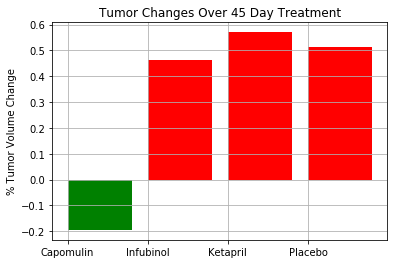

In [221]:
plt.bar(x_axis, drugs_pt['Capomulin'], color='green', align="edge")
plt.bar(x_axis, drugs_pt['Infubinol'], color='red', align="edge")
plt.bar(x_axis, drugs_pt['Ketapril'], color='red', align="edge")
plt.bar(x_axis, drugs_pt['Placebo'], color='red', align="edge")
x_axis = np.arange(len(drugs_pt))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.title("Tumor Changes Over 45 Day Treatment")
# Adding y labels
plt.ylabel("% Tumor Volume Change")
plt.grid()
plt.savefig("Summary Bar Graph")